In [1]:
# Импортируемые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = r"D:\JupyterNotebook\GMCS\Problem1\Problem1.xlsx"
xls = pd.ExcelFile(path)
df_train = pd.read_excel(xls, sheet_name="Обучение")
df_test = pd.read_excel(xls, sheet_name="Тест")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата рейса               1750 non-null   datetime64[ns]
 1   Откуда                   1750 non-null   object        
 2   Куда                     1750 non-null   object        
 3   Продолжительность рейса  1750 non-null   object        
 4   ВС                       1750 non-null   object        
 5   Мест на рейсе            1750 non-null   int64         
 6   Тип услуги               1750 non-null   object        
 7   Доступных мест услуги    1750 non-null   int64         
 8   Цена, руб                1750 non-null   float64       
 9   Фактический спрос        1750 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 136.8+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Дата рейса               162 non-null    datetime64[ns]
 1   Откуда                   162 non-null    object        
 2   Куда                     162 non-null    object        
 3   Продолжительность рейса  162 non-null    object        
 4   ВС                       162 non-null    object        
 5   Мест на рейсе            162 non-null    int64         
 6   Тип услуги               162 non-null    object        
 7   Доступных мест услуги    162 non-null    int64         
 8   Цена, руб                162 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 11.5+ KB


Нулевых значений как в train сете, так и test сете, нет. Это не может не радовать :)

In [5]:
# Преобразуем название колонок в более удобный формат.
df_train = df_train.rename(columns={
    'Дата рейса': 'date',
    'Откуда': 'from',
    'Куда': 'to',
    'Продолжительность рейса': 'duration',
    'ВС': 'aircraft_type',
    'Мест на рейсе': 'seats',
    'Тип услуги': 'service_type',
    'Доступных мест услуги': 'num_of_available_service',
    'Цена, руб': 'price',
    'Фактический спрос': 'demand',
})

df_test = df_test.rename(columns={
    'Дата рейса': 'date',
    'Откуда': 'from',
    'Куда': 'to',
    'Продолжительность рейса': 'duration',
    'ВС': 'aircraft_type',
    'Мест на рейсе': 'seats',
    'Тип услуги': 'service_type',
    'Доступных мест услуги': 'num_of_available_service',
    'Цена, руб': 'price'
})

Для начала создадим диаграмму, которая будет отражать информацию о маршрутах.

In [6]:
route_train_frame = df_train.groupby(['from', 'to'], as_index=False) \
    .count()[['from', 'to', 'date']] \
    .rename(columns={'date': 'count'})
route_train_frame['route'] = route_train_frame['from'].str.cat(route_train_frame['to'], sep=' - ')
route_train_frame = route_train_frame.drop(['from', 'to'], axis=1)

In [7]:
route_test_frame = df_test.groupby(['from', 'to'], as_index=False) \
    .count()[['from', 'to', 'date']] \
    .rename(columns={'date': 'count'})
route_test_frame['route'] = route_test_frame['from'].str.cat(route_test_frame['to'], sep=' - ')
route_test_frame = route_test_frame.drop(['from', 'to'], axis=1)

<AxesSubplot:xlabel='count', ylabel='route'>

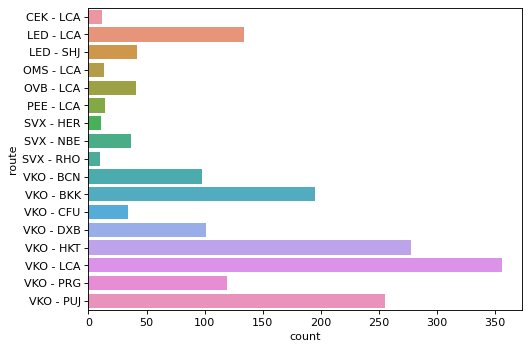

In [8]:
plt.figure(figsize=(7, 5), dpi=80)
sns.barplot(data=route_train_frame, x='count', y='route')

<AxesSubplot:xlabel='count', ylabel='route'>

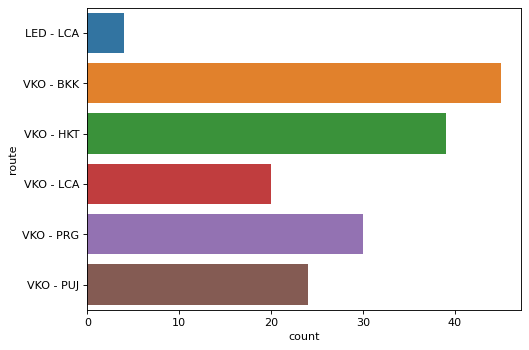

In [9]:
plt.figure(figsize=(7, 5), dpi=80)
sns.barplot(data=route_test_frame, x='count', y='route')

Опираясь на диаграммы можно сделать следующие выводы:

1) все маршруты, представленные в train множестве, также есть и в test сете.

2) мы видим информацию о частоте тех или иных маршрутов.

Данная диаграмма поможет нам при составлении прогнозной модели. Возможно в будущем мы будем учитывать направление перелета.

Далее создадим сводную таблицу на train и test выборках, чтобы узнать инсайты о полетах. Мы это делаем, так как нам дана информация о продажах дополнительных услуг, а на одном рейсе могут быть проданы несколько доп. услуг. Таким образом мы избегаем повторений.

In [10]:
df_train_pivot_table_1 = pd.pivot_table(
    data=df_train,
    index=['date', 'from', 'to', 'duration', 'aircraft_type', 'seats']
).reset_index().drop(['demand', 'num_of_available_service', 'price'], axis=1)

df_test_pivot_table_1 = pd.pivot_table(
    data=df_test,
    index=['date', 'from', 'to', 'duration', 'aircraft_type', 'seats']
).reset_index().drop(['num_of_available_service', 'price'], axis=1)

In [11]:
df_train_pivot_table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           945 non-null    datetime64[ns]
 1   from           945 non-null    object        
 2   to             945 non-null    object        
 3   duration       945 non-null    object        
 4   aircraft_type  945 non-null    object        
 5   seats          945 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 44.4+ KB


In [12]:
df_test_pivot_table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           70 non-null     datetime64[ns]
 1   from           70 non-null     object        
 2   to             70 non-null     object        
 3   duration       70 non-null     object        
 4   aircraft_type  70 non-null     object        
 5   seats          70 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.4+ KB


Таким образом, мы видим, что  уникальных перелетов в train сете - 945, а в test - 70. Далее построим графики, который расскажут нам о инсайтах в рейсах.

In [13]:
df_train_pivot_table_1.head()

,date,from,to,duration,aircraft_type,seats
0,2016-10-01,LED,LCA,от 3 до 6 часов,ВС1,522
1,2016-10-01,VKO,LCA,от 3 до 6 часов,ВС1,522
2,2016-10-02,VKO,LCA,от 3 до 6 часов,ВС1,522
3,2016-10-03,LED,LCA,от 3 до 6 часов,ВС1,522
4,2016-10-03,VKO,LCA,от 3 до 6 часов,ВС1,522


In [14]:
df_test_pivot_table_1.head()

,date,from,to,duration,aircraft_type,seats
0,2018-04-01,VKO,LCA,от 3 до 6 часов,ВС1,522
1,2018-04-01,VKO,PRG,< 3 часов,ВС2,189
2,2018-04-02,VKO,BKK,> 6 часов,ВС1,522
3,2018-04-02,VKO,HKT,> 6 часов,ВС1,522
4,2018-04-02,VKO,PRG,< 3 часов,ВС2,189


<AxesSubplot:xlabel='aircraft_type', ylabel='count'>

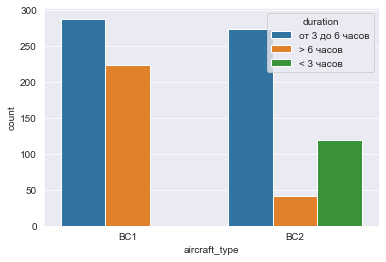

In [15]:
sns.set_style("darkgrid")
sns.countplot(data=df_train_pivot_table_1, x='aircraft_type', hue='duration')

<AxesSubplot:xlabel='aircraft_type', ylabel='count'>

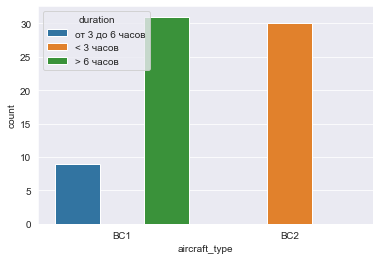

In [16]:
sns.set_style("darkgrid")
sns.countplot(data=df_test_pivot_table_1, x='aircraft_type', hue='duration')

Я построил диаграмму, которая отражает какой тип воздушного судна будет использовать в зависимости от длительности перелета. Из данного графика мы можем сделать следующие выводы. 

1) ВС под кодом "BC1" используется только на переетах от 3 до 6 часов и от 6 часов, как в train, так и в test выборке.

2) ВС под кодом "BC2" используется на всех перелетах в зависимости от длительности на train выборке, а в тестовой выборке - только на коротких перелетах (< 3 часов).

<AxesSubplot:xlabel='seats', ylabel='count'>

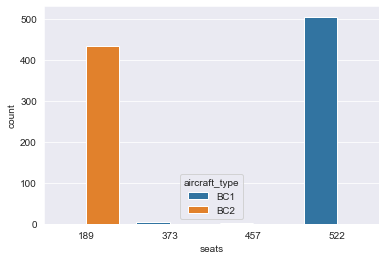

In [17]:
sns.set_style("darkgrid")
sns.countplot(data=df_train_pivot_table_1, x='seats', hue='aircraft_type')

<AxesSubplot:xlabel='seats', ylabel='count'>

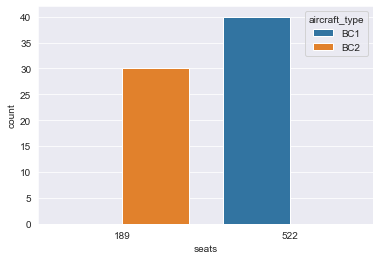

In [18]:
sns.set_style("darkgrid")
sns.countplot(data=df_test_pivot_table_1, x='seats', hue='aircraft_type')

In [19]:
df_train_pivot_table_1.groupby(['aircraft_type', 'seats']).aggregate({'seats': 'count'})

seats
aircraft_type seats       
ВС1           373        4
              457        2
              522      505
ВС2           189      434

Из графиков представленных выше мы видим, что ВС под кодом "ВС1" вмещает больше людей, нежели "ВС2".

# 

<AxesSubplot:xlabel='None-service_type', ylabel='aircraft_type-duration'>

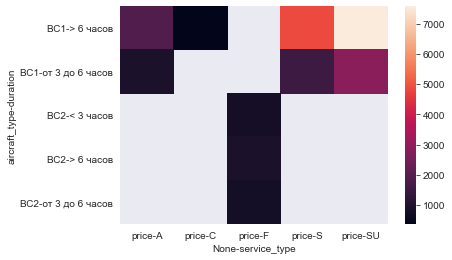

In [20]:
sns.heatmap(pd.pivot_table(data=df_train[['aircraft_type', 'duration', 'service_type', 'price']],
               index=['aircraft_type', 'duration'],
               columns=['service_type'],
               aggfunc=np.average))

<AxesSubplot:xlabel='None-service_type', ylabel='aircraft_type-duration'>

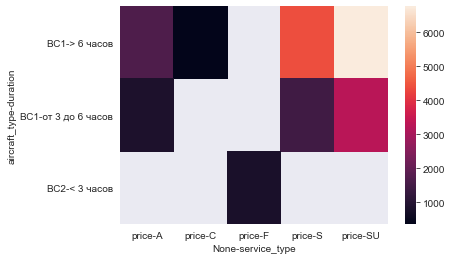

In [21]:
sns.heatmap(pd.pivot_table(data=df_test[['aircraft_type', 'duration', 'service_type', 'price']],
               index=['aircraft_type', 'duration'],
               columns=['service_type'],
               aggfunc=np.average))

Две диаграммы, представленные в таблице выше, отражают стоимость услуг в зависимости от типа воздушного судна и длительности перелета. Из этих диаграмм можно сделать следущие выводы:

1) Услуга под кодом "F" предоставляется только на ВС2 как в train сете, так и в test сете.

2) Услуга под кодом "C" предоставляется только на ВС1, длительность перелета которого > 6 часов. Это справедливо как для train множества, так и для тестового множества.

3) Услуги под кодами "A", "S", "SU" предоставляются только на ВС1 и при этом градация по средней стоимости услуг следующая (от самой дорогой к самой дешевой) - "SU" next "S" next "A". Данное правило также соблюдается в зависимости от длительности перелета как для train множества, так и для тестового множества.

In [22]:
import calendar

Для начала поймем влияет ли как нибудь месяц на спрос и предложение той или иной услуги.

In [23]:
df_train['month_route'] = list(map(lambda elem: calendar.month_abbr[elem.month], df_train.date))
df_test['month_route'] = list(map(lambda elem: calendar.month_abbr[elem.month], df_test.date))

<AxesSubplot:xlabel='service_type', ylabel='num_of_available_service'>

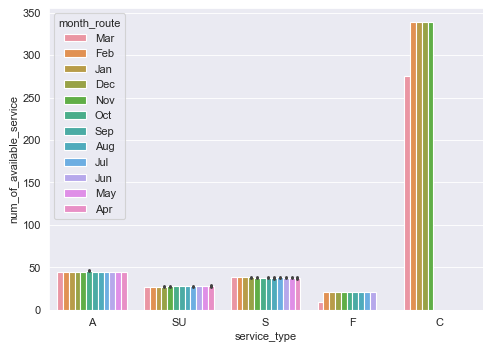

In [24]:
plt.figure(figsize=(7, 5), dpi=80)
sns.barplot(data=df_train,
            x='service_type',
            y='num_of_available_service',
            hue='month_route')

<AxesSubplot:xlabel='service_type', ylabel='num_of_available_service'>

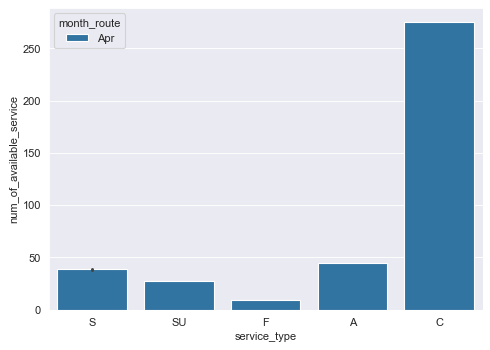

In [25]:
plt.figure(figsize=(7, 5), dpi=80)
sns.barplot(data=df_test,
            x='service_type',
            y='num_of_available_service',
            hue='month_route')

<AxesSubplot:xlabel='service_type', ylabel='demand'>

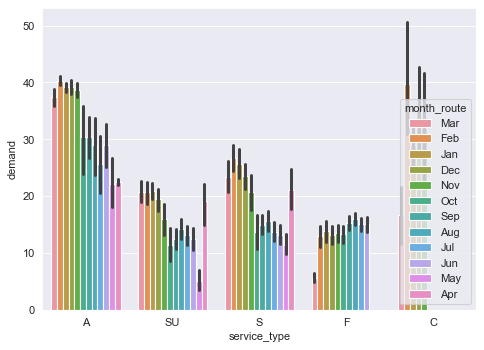

In [26]:
plt.figure(figsize=(7, 5), dpi=80)
sns.barplot(data=df_train,
            x='service_type',
            y='demand',
            hue='month_route')

Опираясь на диаграммы выше, можно сделать следующие выводы:

1) Предложение услуг в разные месяцы почти не отличается.

2) В тестовой выборке мы видим только данные за Апрель.

3) Спрос на ту или иную услугу в зависимости от месяца различается.

Эти выводы не могут не радовать :))

# 

# Прогнозная модель

# Модель 1

Данная модель будет основана на среднем спросе на i-тую услугу в зависимости от типа маршрута и типа услуги, но уже с дальнейшей поправкой на месяц. 

Для того чтобы корректно определить эту поправку для начала нужно узнать - Как меняется спрос в зависимости от маршрута, длительности маршрута и типа услуги. Для этого создадим новое поле, которое будет объединять колонки "from" и "to".

In [27]:
df_train['route'] = df_train['from'].str.cat(df_train['to'], sep=' - ')
df_test['route'] = df_test['from'].str.cat(df_test['to'], sep=' - ')

<AxesSubplot:xlabel='None-service_type', ylabel='route'>

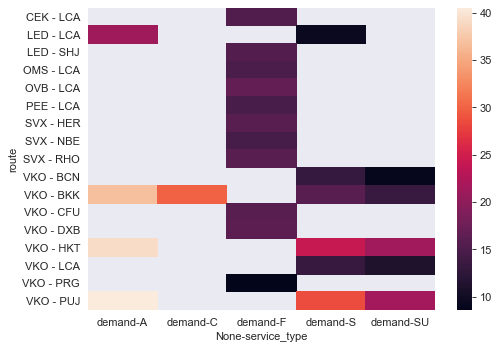

In [28]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(pd.pivot_table(
    data=df_train[['route', 'service_type', 'demand']],
    index=['route'],
    columns=['service_type'],
    values=['demand'],
    aggfunc=np.average))

В данной модели при формировании поправки на месяц, мы примем следующую гипотезу: Направление маршрута никак не влияет на спрос той или иной услуги.

Спойлер: в следующей модели мы учтем и направление маршрута.

Тогда наша поправка будет основываться на 2 фичах:

1) тип услуги;

2) месяц маршрута.

Далее рассчитаем эту поправку.

In [29]:
correction_frame1 = df_train.groupby(['service_type', 'month_route'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand_1'})

correction_frame2 = df_train.groupby(['service_type'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand_2'})

In [30]:
correction_frame = correction_frame1.merge(correction_frame2, on=['service_type'])
correction_frame['coef_correction'] = correction_frame.mean_demand_1 / correction_frame.mean_demand_2
correction_frame = correction_frame.drop(['mean_demand_1', 'mean_demand_2'], axis=1)

<AxesSubplot:xlabel='None-month_route', ylabel='service_type'>

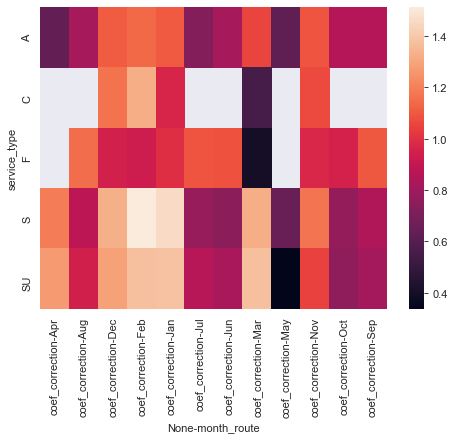

In [31]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

Данная диаграма отражает коэффициент спроса на ту или иную услугу в зависимости от типа услуги и месяца.

In [32]:
df_train = df_train.merge(correction_frame, on=['service_type', 'month_route'])
df_test = df_test.merge(correction_frame, 
              on=['service_type', 'month_route'], 
              how='left').fillna(-1)

Мы видим, что при довабвлениив test множетсва получившихся коэффициентов, некоторые знанчения принимают Nan. Нам нужно от их избавиться, выявив некоторые закономерности. Как мы это будем делать я расскажу ниже.

In [33]:
to_coef_correction = df_test[df_test.coef_correction == -1] \
    .groupby(['service_type', 'month_route'], as_index=False) \
    .count()[['service_type', 'month_route']]

to_coef_correction['coef_correction'] = -1

correction_frame = correction_frame.append(to_coef_correction).reset_index(drop=True)

<AxesSubplot:xlabel='None-month_route', ylabel='service_type'>

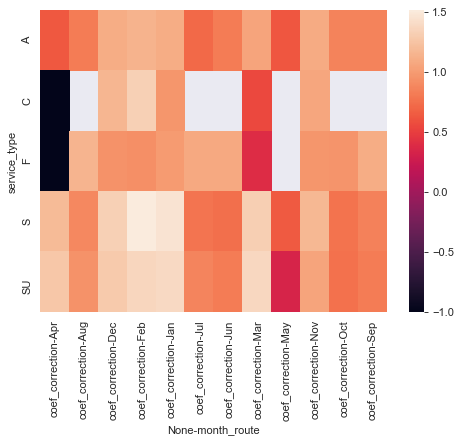

In [34]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

Для черных ячеек из диаграммы выше мы должны предсказать ожидаемый коэффициент спроса.

In [35]:
month_dict = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [36]:
correction_frame['month_num'] = list(map(lambda elem: month_dict[elem], correction_frame.month_route))
correction_frame = correction_frame.sort_values('month_num').reset_index(drop=True)

<AxesSubplot:title={'center':'Изменение спроса на услугу A'}, xlabel='month_route', ylabel='coef_correction'>

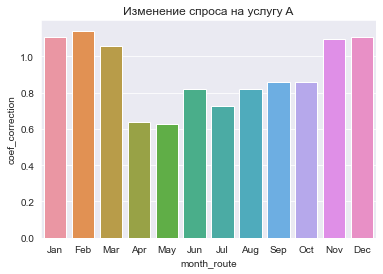

In [37]:
plt.title('Изменение спроса на услугу A')
sns.barplot(x=correction_frame[correction_frame.service_type == 'A'].month_route,
            y=correction_frame[correction_frame.service_type == 'A'].coef_correction)

<AxesSubplot:title={'center':'Изменение спроса на услугу С'}, xlabel='month_route', ylabel='coef_correction'>

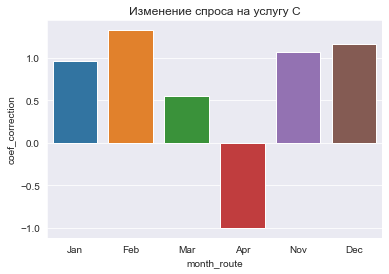

In [38]:
plt.title('Изменение спроса на услугу С')
sns.barplot(x=correction_frame[correction_frame.service_type == 'C'].month_route,
            y=correction_frame[correction_frame.service_type == 'C'].coef_correction)

<AxesSubplot:title={'center':'Изменение спроса на услугу F'}, xlabel='month_route', ylabel='coef_correction'>

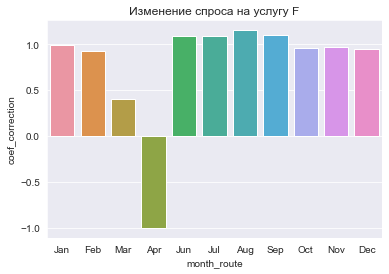

In [39]:
plt.title('Изменение спроса на услугу F')
sns.barplot(x=correction_frame[correction_frame.service_type == 'F'].month_route,
            y=correction_frame[correction_frame.service_type == 'F'].coef_correction)

<AxesSubplot:title={'center':'Изменение спроса на услугу S'}, xlabel='month_route', ylabel='coef_correction'>

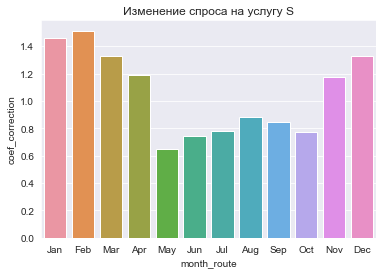

In [40]:
plt.title('Изменение спроса на услугу S')
sns.barplot(x=correction_frame[correction_frame.service_type == 'S'].month_route,
            y=correction_frame[correction_frame.service_type == 'S'].coef_correction)

<AxesSubplot:title={'center':'Изменение спроса на услугу SU'}, xlabel='month_route', ylabel='coef_correction'>

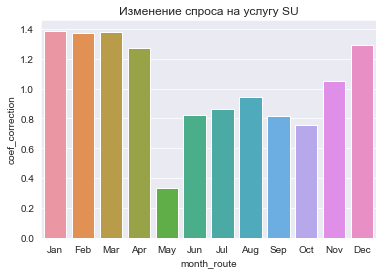

In [41]:
plt.title('Изменение спроса на услугу SU')
sns.barplot(x=correction_frame[correction_frame.service_type == 'SU'].month_route,
            y=correction_frame[correction_frame.service_type == 'SU'].coef_correction)

Из данных графиков мы видим, что спрос на все услуги с марта по май включительно снижается, поэтому логично предположить, что и в Апреле он будет снижатся. Этот инсайт не может не радовать :)

Тогда сделаем следующие допущение:

1) Пусть коэффициент спроса на услугу C в Апреле равняется коэффициенту спроса на услугу C в Марте.

2) Пусть коэффициент спроса на услугу F в Апреле равняется коэффициенту спроса на услугу F в Марте.

Возможно это слишком грубо и стоит разработь более эффективный алгоритм, но пока что оставим это так. В дальнейшем, если наша модель не будет работать мы вернемся к этому моменту.

In [42]:
query_1 = (correction_frame.service_type == 'C') &  (correction_frame.month_route == 'Apr')
true_value_1 = (correction_frame.service_type == 'C') &  (correction_frame.month_route == 'Mar')

query_2 = (correction_frame.service_type == 'F') &  (correction_frame.month_route == 'Apr')
true_value_2 = (correction_frame.service_type == 'F') &  (correction_frame.month_route == 'Mar')

In [43]:
correction_frame.loc[query_1, 'coef_correction'] = correction_frame.loc[true_value_1, 'coef_correction'].item()
correction_frame.loc[query_2, 'coef_correction'] = correction_frame.loc[true_value_2, 'coef_correction'].item()

Тогда наша диаграмма примет следующий вид. Красиво :)

<AxesSubplot:xlabel='None-month_route', ylabel='service_type'>

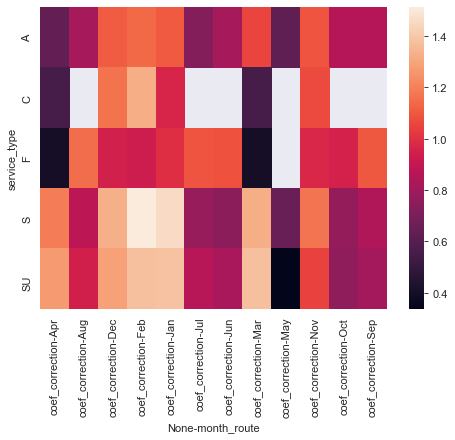

In [44]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

In [45]:
df_test = df_test.drop('coef_correction', axis=1)
df_test = df_test.merge(correction_frame, on=['service_type', 'month_route'])

Далее будем реализовывать модель. Логика следующая:

1) смотрим какой был средний спрос на услуги в зависимости от направления маршрута и типа услуги.

2) берем это значение и применяем поправку на месяц.

In [46]:
mean_demand = df_train.groupby(['route', 'service_type'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand'})

In [47]:
df_train = df_train.merge(mean_demand, on=['route', 'service_type'])
df_test = df_test.merge(mean_demand, on=['route', 'service_type'])

In [48]:
df_train['predicted_demand'] = np.round(df_train.coef_correction * df_train.mean_demand).astype('int')
df_test['predicted_demand'] = np.round(df_test.coef_correction * df_test.mean_demand).astype('int')

<AxesSubplot:>

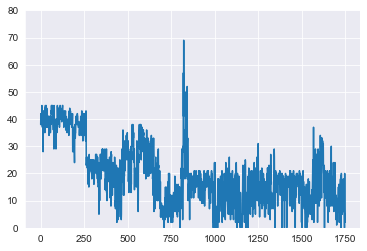

In [54]:
plt.ylim([0, 80])
df_train.demand.plot()

<AxesSubplot:>

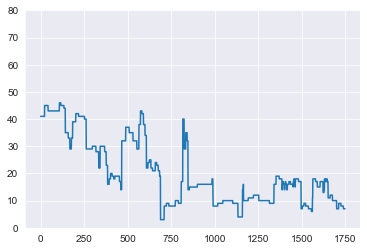

In [55]:
plt.ylim([0, 80])
df_train.predicted_demand.plot()

Анализируя графики выши, мы видим, что геометрия повторяется, однако абсолютные значения на предсказанных данных по некоторым полям ниже нежели на реальных. Также мы не учитываем возможные выбросы данных и влияние направления маршрута на результат.

Таким образом, при составлении данной модели, мы учитывали следующие моменты:

1) средний спрос на услугу в зависимоти от типа маршрута и типа услуги.

2) использовали поправку на месяц перелета, которая основывалась на 2-ух фичах:
    
    1) тип услуги;
    
    2) тип месяца.

Для оценки качества модели будем использовать средний квадрат ошибки.

In [63]:
print(f'Ошибка 1-ой модели составляет {np.mean((df_train.demand.to_numpy() - df_train.predicted_demand.to_numpy()) ** 2)}')

Ошибка 1-ой модели составляет 43.064


# 2 модель

Следующая модель будет также основана на среднем спросе на i-тую услугу в зависимости от типа услуги с дальнейшей поправкой на месяц. Однако при составлении этой поправки мы будем также использовать направление маршрута.

Для того чтобы корректно определить эту поправку для начала нужно узнать - Как меняется спрос в зависимости от маршрута и типа услуги. Для этого создадим новое поле, которое будет объединять колонки "from" и "to".

In [27]:
df_train['route'] = df_train['from'].str.cat(df_train['to'], sep=' - ')
df_test['route'] = df_test['from'].str.cat(df_test['to'], sep=' - ')

<AxesSubplot:xlabel='None-service_type', ylabel='route'>

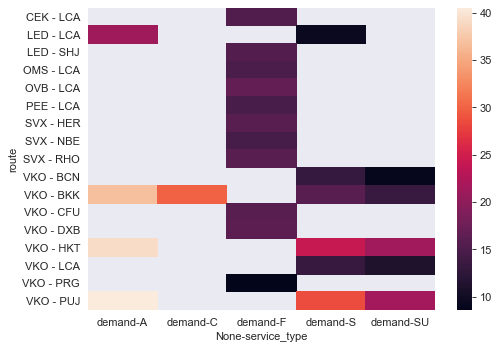

In [28]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(pd.pivot_table(
    data=df_train[['route', 'service_type', 'demand']],
    index=['route',],
    columns=['service_type'],
    values=['demand'],
    aggfunc=np.average))

В данной модели при составлении поправки, мы будем учиытвать следующие переменные:

1) Тип услуги;

2) Месяц;

3) Напрвление маршрута.

Далее рассчитаем эту поправку.

In [29]:
correction_frame1 = df_train.groupby(['route', 'service_type', 'month_route'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand_1'})

correction_frame2 = df_train.groupby(['route', 'service_type'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand_2'})

In [30]:
correction_frame = correction_frame1.merge(correction_frame2, on=['route', 'service_type'])
correction_frame['coef_correction'] = correction_frame.mean_demand_1 / correction_frame.mean_demand_2
correction_frame = correction_frame.drop(['mean_demand_1', 'mean_demand_2'], axis=1)

<AxesSubplot:xlabel='None-month_route', ylabel='route-service_type'>

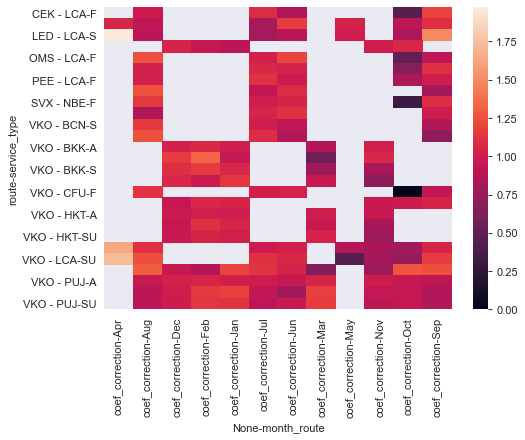

In [31]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['route', 'service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

Данная диаграма отражает коэффициент спроса на ту или иную услугу в зависимости от типа направления маршрута, типа услуги и месяца.

In [32]:
df_train = df_train.merge(correction_frame, on=['route', 'service_type', 'month_route'])
df_test = df_test.merge(correction_frame, 
              on=['route', 'service_type', 'month_route'], 
              how='left').fillna(-1)

Мы видим, что при довабвлениив test множетсва получившихся коэффициентов, некоторые знанчения принимают Nan. Нам нужно от их избавиться, выявив некоторые закономерности. Как мы это будем делать я расскажу ниже.

In [33]:
to_coef_correction = df_test[df_test.coef_correction == -1] \
    .groupby(['route', 'service_type', 'month_route'], as_index=False) \
    .count()[['route', 'service_type', 'month_route']]

to_coef_correction['coef_correction'] = -1

correction_frame = correction_frame.append(to_coef_correction).reset_index(drop=True)

<AxesSubplot:xlabel='None-month_route', ylabel='route-service_type'>

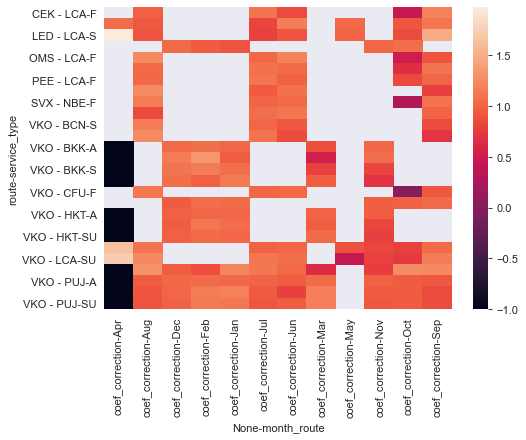

In [34]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['route', 'service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

Для черных ячеек из диаграммы выше мы должны каким-то образом определить коэффициент спроса.

In [35]:
month_dict = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [36]:
correction_frame['month_num'] = list(map(lambda elem: month_dict[elem], correction_frame.month_route))
correction_frame = correction_frame.sort_values('month_num').reset_index(drop=True)

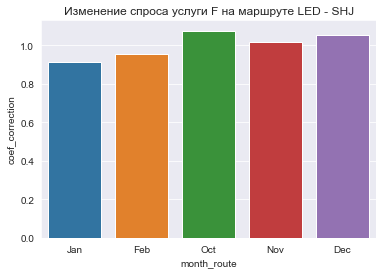

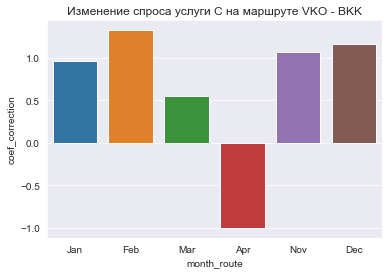

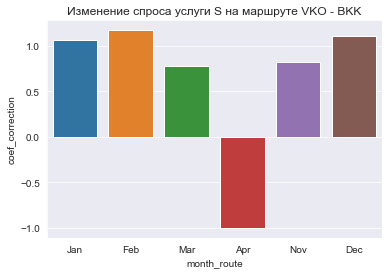

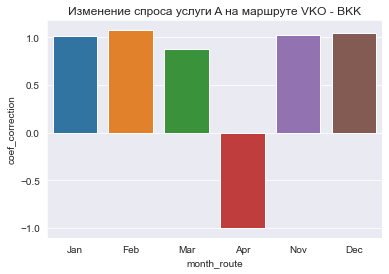

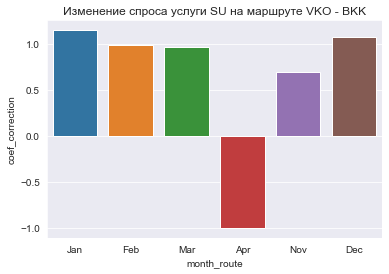

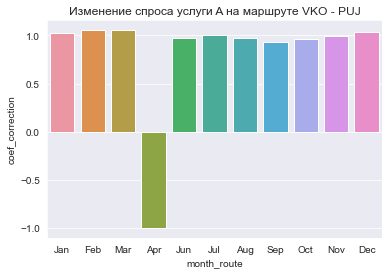

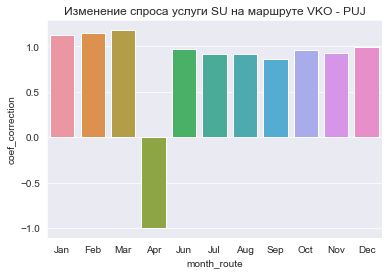

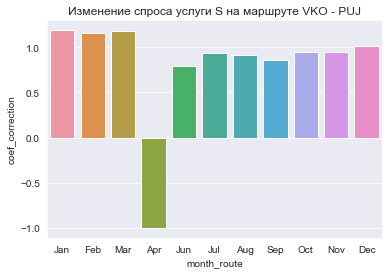

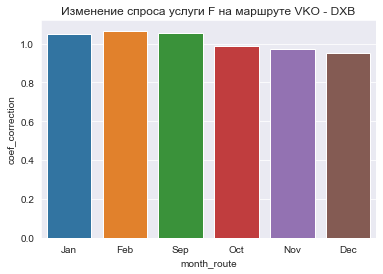

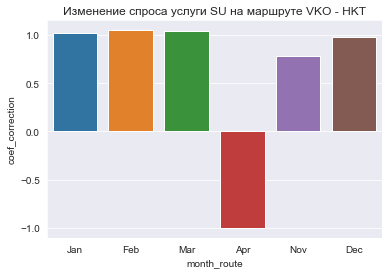

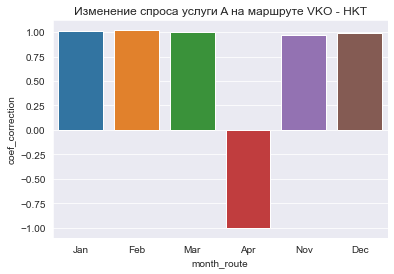

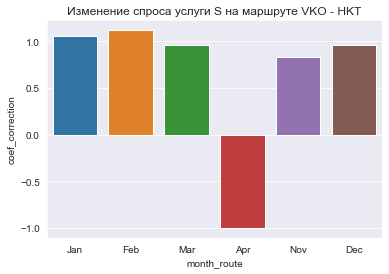

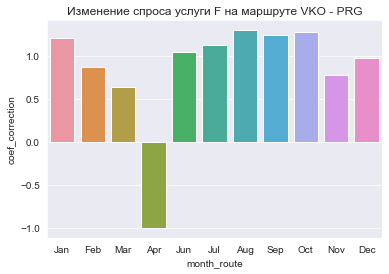

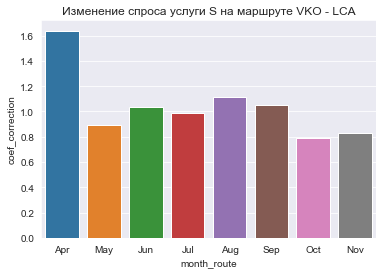

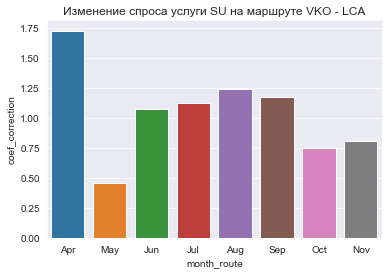

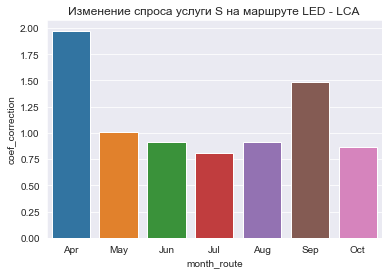

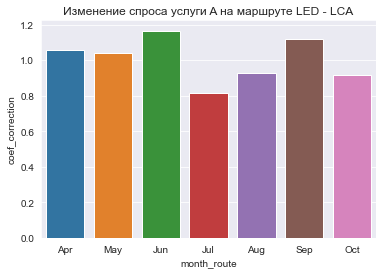

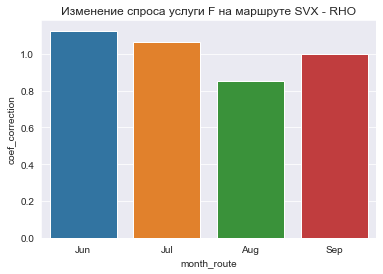

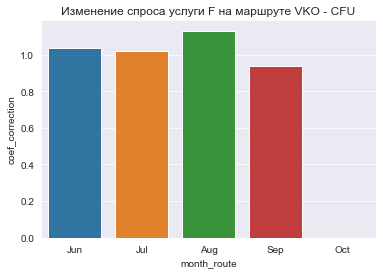

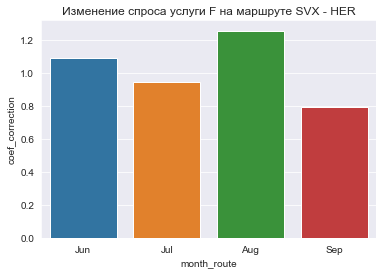

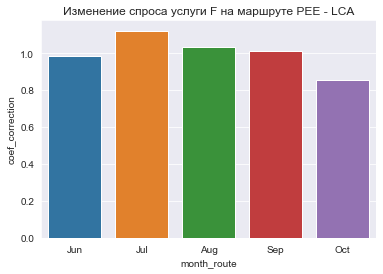

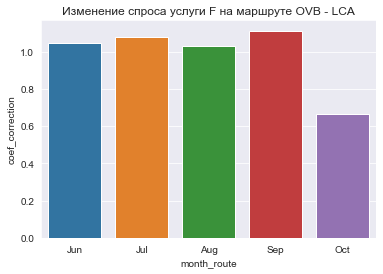

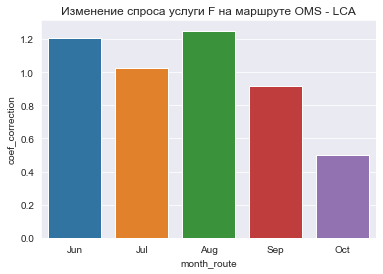

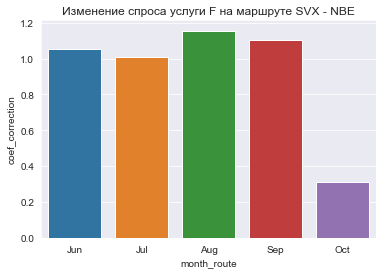

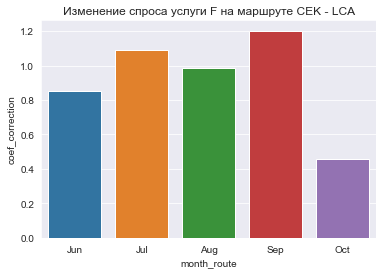

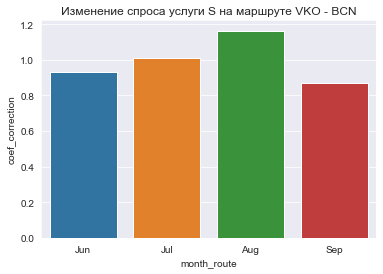

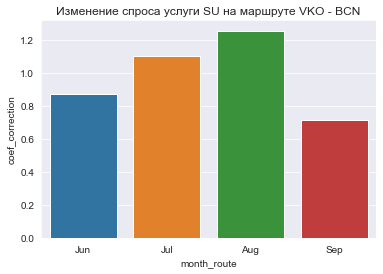

In [37]:
for route in correction_frame.route.unique():
    get_unique_service = correction_frame[correction_frame.route == route].service_type.unique()
    for service in get_unique_service:
        plt.title(f'Изменение спроса услуги {service} на маршруте {route}')
        cond = (correction_frame.route == route) & (correction_frame.service_type == service)
        sns.barplot(
            x=correction_frame.loc[cond].month_route,
            y=correction_frame.loc[cond].coef_correction
        )
        plt.show()

Логика получения недостающих коэффициентов следующая:

1) Мы получаем определенный коэф (i);

2) Ищем ближайшего соседа слева и справа, берем их коэф;

3) Считаем среднее между этими коэф и присваиваем значение.

In [38]:
for elem in correction_frame[correction_frame.coef_correction == -1].to_numpy():
    route = elem[0]
    service = elem[1]
    month = elem[2]
    current_frame = correction_frame.loc[
        (correction_frame.route == route) & \
        (correction_frame.service_type == service)
    ].reset_index(drop=True)
    current_index = current_frame.loc[current_frame.month_route == month].index.item()
    last_month_coef_correction = current_frame.iloc[current_index - 1].coef_correction
    next_month_coef_correction = current_frame.iloc[current_index + 1].coef_correction
    correction_frame.loc[(correction_frame.route == route) & \
                         (correction_frame.service_type == service) & \
                         (correction_frame.month_route == month), 'coef_correction'] = (last_month_coef_correction + next_month_coef_correction) / 2

<AxesSubplot:xlabel='None-month_route', ylabel='route-service_type'>

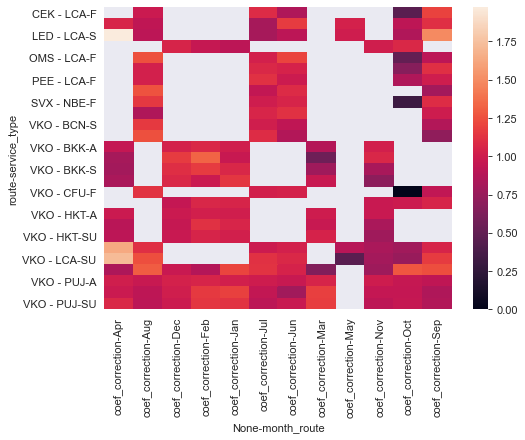

In [39]:
plt.figure(figsize=(7, 5), dpi=80)
sns.heatmap(
    pd.pivot_table(
        data=correction_frame,
        index=['route', 'service_type'],
        columns=['month_route'],
        values=['coef_correction'],
        aggfunc=np.average)
)

Теперь наша диаграмма выглядит следующим образом.

In [40]:
df_test = df_test.drop('coef_correction', axis=1)
df_test = df_test.merge(correction_frame, on=['route', 'service_type', 'month_route'], how='left')

Далее будем реализовывать модель. Логика следующая:

1) смотрим какой был средний спрос на услуги в зависимости от направления маршрута и типа услуги.

2) берем это значение и применяем поправку на месяц.

In [41]:
mean_demand = df_train.groupby(['route', 'service_type'], as_index=False) \
    .aggregate({'demand': 'mean'}) \
    .rename(columns={'demand': 'mean_demand'})

In [42]:
df_train = df_train.merge(mean_demand, on=['route', 'service_type'])
df_test = df_test.merge(mean_demand, on=['route', 'service_type'])

In [43]:
df_train['predicted_demand'] = np.round(df_train.coef_correction * df_train.mean_demand).astype('int')
df_test['predicted_demand'] = np.round(df_test.coef_correction * df_test.mean_demand).astype('int')

<AxesSubplot:>

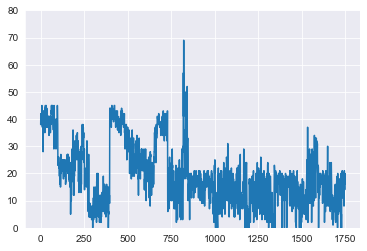

In [44]:
plt.ylim([0, 80])
df_train.demand.plot()

<AxesSubplot:>

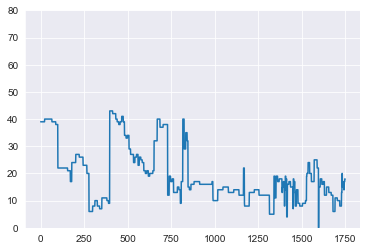

In [45]:
plt.ylim([0, 80])
df_train.predicted_demand.plot()

Анализируя графики выши, мы видим, что геометрия повторяется, однако абсолютные значения на предсказанных данных по некоторым полям ниже нежели на реальных, так как мы основывались на средних показателях. Это модель как по мне лучше, так как мы ввели дополнительную фичу (направление маршрута) при оценке коэффициента спроса.

Таким образом, при составлении данной модели, мы учитывали следующие моменты:

1) средний спрос на услугу в зависимоти от типа маршрута и типа услуги.

2) использовали поправку на месяц перелета, которая основывалась на 3-ех фичах:

    1) тип услуги;
    
    2) тип маршрута;
    
    3) тип месяца.
    
Далее определим ошибку этой модели.

In [47]:
print(f'Ошибка 1-ой модели составляет {np.mean((df_train.demand.to_numpy() - df_train.predicted_demand.to_numpy()) ** 2)}')

Ошибка 1-ой модели составляет 24.72457142857143


# Таким образом, вторая модель показала лучшие результаты. Красиво :)